# Linear and Logistic Regression

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

## Importing the dataset

In [2]:
data=pd.read_csv("HRV.csv")

## Dataset Preprocessing

In [3]:
data.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
BMI_mean=data['BMI'].mean()
data['BMI'].fillna(BMI_mean, inplace=True)
data['BMI'].isnull().sum()

0

In [7]:
totChol_mean=data['totChol'].mean()
data['totChol'].fillna(totChol_mean, inplace=True)
data['totChol'].isnull().sum()

0

In [8]:
heartRate_mean=data['heartRate'].mean()
data['heartRate'].fillna(heartRate_mean, inplace=True)
data['heartRate'].isnull().sum()

0

In [9]:
glucose_mean=data['glucose'].mean()
data['glucose'].fillna(glucose_mean, inplace=True)
data['glucose'].isnull().sum()

0

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [10]:
x=data.drop('totChol', axis=1)

In [11]:
x.sample()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4009,1,39,1,118.0,74.0,22.66,79.0,76.0,0


In [12]:
y=data[['totChol']]

In [13]:
y.sample()

,totChol
197,248.0


## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y,
                                                  test_size=.15,
                                                  random_state=20)

## Training the Linear Regression model 

In [15]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

In [16]:
X_train.head()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
669,0,49,0,145.0,81.0,23.10,75.0,83.0,0
2892,0,50,0,109.0,70.0,20.74,75.0,77.0,0
180,0,37,0,112.0,60.0,23.67,81.0,75.0,0
3156,1,51,1,157.0,87.0,24.44,95.0,84.0,0
1606,0,61,1,168.0,98.0,27.30,103.0,106.0,0


## Model performance check- R Square and RMSE score

In [17]:
y_pred=regressor.predict(X_test.values)
y_pred[:5]

array([[222.67939862],
       [228.63847459],
       [218.38388034],
       [231.59329835],
       [253.20672525]])

In [18]:
y_test.head()

,totChol
2485,201.0
1056,271.0
2383,228.0
4089,229.0
675,156.0


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("r2 score", r2_score(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred) )
print(f"RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}")

r2 score 0.10494607731354155
MSE 1820.2777694100162
RMSE : 42.66471339889694


## Predicting new results where the actual results are given
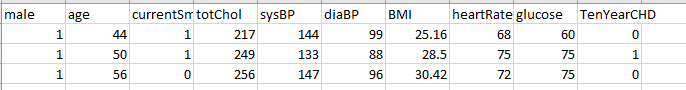

In [20]:
x.sample()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2108,1,56,0,126.5,76.0,25.14,58.0,70.0,1


In [21]:
# case 1 actual 217
regressor.predict([[1, 44, 1,144,99,25.16,68,60,0]])

array([[229.26666899]])

In [22]:
# case 2 actual 249
regressor.predict([[1, 50, 1,133,88,28.5,75,75,1]])

array([[238.6310741]])

In [23]:
# case 3 actual 256
regressor.predict([[1, 56, 0,147,96,30.42,72,75,0]])

array([[244.46356011]])

My linear regression model does not predict the total cholesteral well. It is consistently +-12 points off either high or lower which creates a wide range of possiblitlies. My three predictions above are evidence that it is slightly off. If you could get this range smaller it would be a much better model.

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4234 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4234 non-null   float64
 7   heartRate      4234 non-null   float64
 8   glucose        4234 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [25]:
data.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


### Create independent and dependent variables to predict

In [26]:
a=data.drop("TenYearCHD", axis=1)
b=data[['TenYearCHD']]

In [27]:
a.sample()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
2005,0,47,1,261.0,133.0,77.0,27.96,87.0,105.0


In [28]:
b.sample()

,TenYearCHD
308,0


## Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test= train_test_split(a, b,
                                                  test_size=.15,
                                                  random_state=20)

In [30]:
a_train.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
669,0,49,0,262.0,145.0,81.0,23.10,75.0,83.0
2892,0,50,0,250.0,109.0,70.0,20.74,75.0,77.0
180,0,37,0,300.0,112.0,60.0,23.67,81.0,75.0
3156,1,51,1,696.0,157.0,87.0,24.44,95.0,84.0
1606,0,61,1,356.0,168.0,98.0,27.30,103.0,106.0


## Training the Logistic Regression model 

In [31]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=500)
classifier.fit(a_train.values, b_train.values.ravel())

LogisticRegression(max_iter=500)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [32]:
b_pred=classifier.predict(a_test.values)

In [33]:
b_pred[:5]

array([0, 0, 0, 0, 0])

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm=confusion_matrix(b_test,b_pred)
print(cm)

[[545   7]
 [ 78   6]]


In [35]:
print(classifier.classes_)

[0 1]


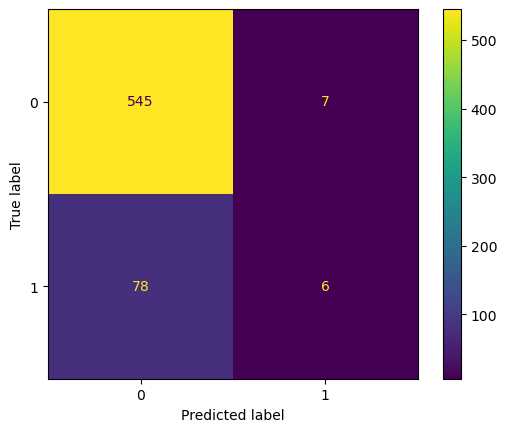

In [36]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

## Predicting new results where the actual results are given
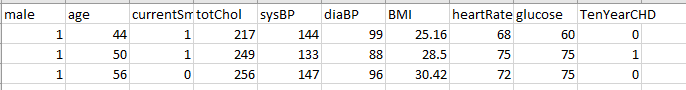

In [37]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

[0]


In [38]:
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))

[0]


In [39]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

[0]


### Discuss the results

My model was good at predicting non TenYearCHD (heart disease) but bad at predicting positive cases due to the lack of posistive entrys and opprotunities to learn what bring about a positive result.

### Summary

In summary both regressions had there flaws, but the legistical regression did better than the linear. The linear regression had a wide range of answers being +-12 points off which gives little value while the legistical regression only struggled with finding positive results but did find plenty of true negative results.